# Decison Trees

First we'll load some

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import os
import path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df = pd.read_csv("BGT_BRC.csv")
df_test= pd.read_csv("BGT_BRC_test.csv")

In [2]:
df

,DP,TS,STN,PS,EB,COM,IOEX,BP,BGT,AXR
0,2,1,1,1,2,1,1,1,1,1
1,4,2,1,1,4,1,1,1,1,1
2,5,3,1,1,5,1,1,2,1,1
3,6,3,1,1,6,1,1,2,1,1
4,8,4,2,2,8,2,2,3,2,2
5,10,5,2,2,10,2,2,3,2,2
6,12,6,2,2,12,2,2,3,2,2
7,14,7,2,3,14,2,2,5,3,2
8,16,8,2,3,16,3,3,5,4,2


In [33]:
#df_test.head()

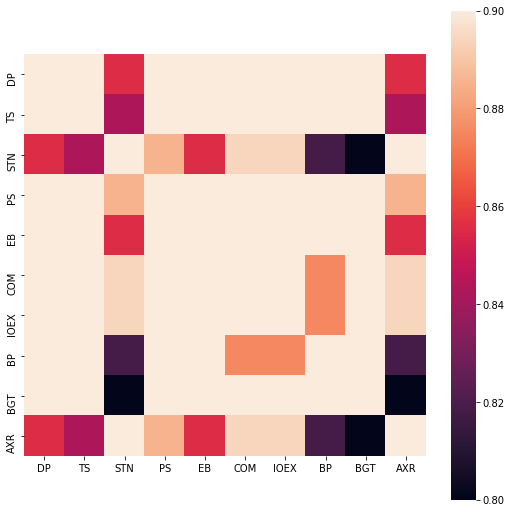

In [3]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

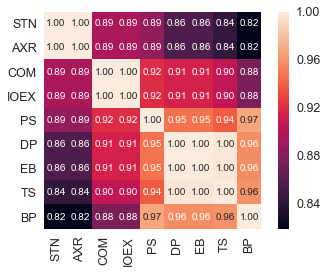

In [5]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'AXR')['AXR'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

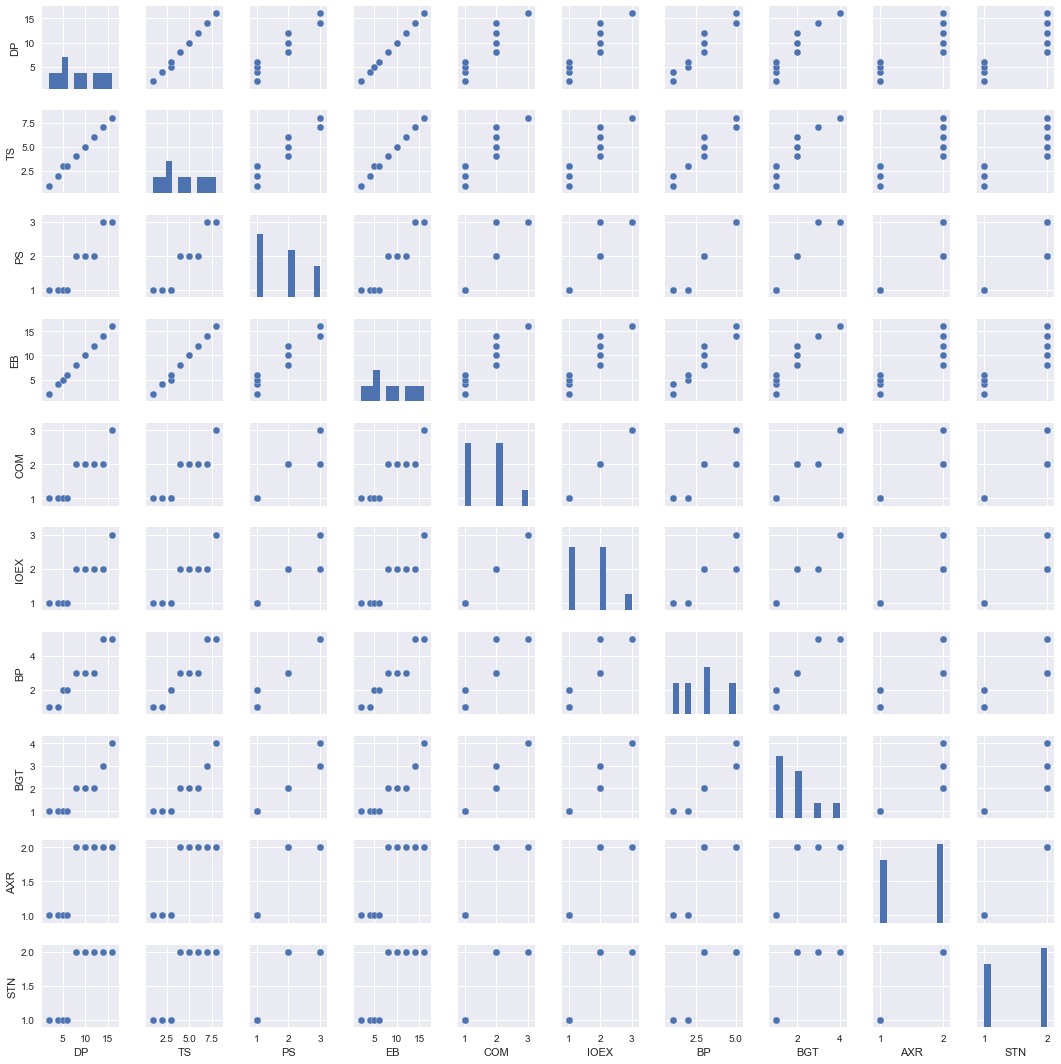

In [6]:
#scatterplot wich will help in exploratory data visualization
sns.set()
cols = ['DP','TS','PS','EB','COM','IOEX','BP','BGT','AXR','STN']
sns.pairplot(df[cols], size = 1.5)
plt.show();

scikit-learn needs everything to be numerical for decision trees to work. So, we'll slice the column till 7th and predict the BGT

In [7]:
features = list(df.columns[:8])
features

['DP', 'TS', 'STN', 'PS', 'EB', 'COM', 'IOEX', 'BP']

Now actually construct the decision tree:

In [9]:
y = df['BGT']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

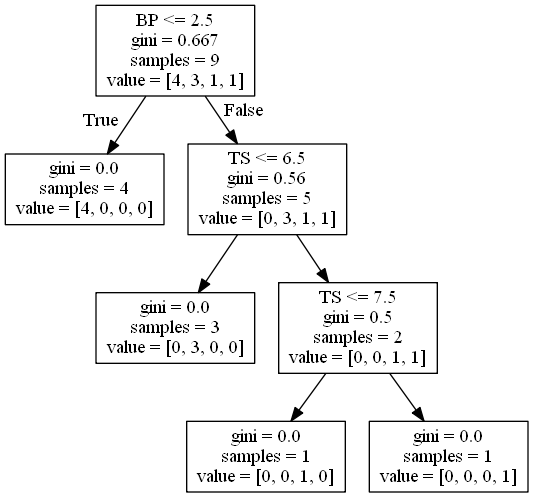

In [10]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 8 decision trees to predict the BGT required

In [11]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(3)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict 
print (clf.predict([[4, 2, 1, 1,4, 1, 1,1]]))
#predict
print (clf.predict([[14, 8, 2,2, 14, 2, 2,3]]))

[1]
[2]


C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=X.shape[1],n_folds=2,shuffle=True,random_state=1)
RF_cls=RandomForestClassifier(n_estimators=10)
score=np.mean(cross_val_score(RF_cls,X,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))
print('Accuracy:%0.3f'%score)

Accuracy:0.875


C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn import tree
for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth<depth:
        break
    score = np.mean(cross_val_score(tree_classifier,X,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))
    print('Depth: %i Accuracy: %3f' % (depth,score))

Depth: 1 Accuracy: 0.750000
Depth: 2 Accuracy: 0.750000
Depth: 3 Accuracy: 0.750000
